# Predict Restaurant Menu Items Profitability

## About Dataset
### Overview:
This dataset provides insights into restaurant menu optimization, aiming to maximize profitability by analyzing menu item categories, ingredients, prices, and profitability indicators.

### Variables:
* **RestaurantID**: Identifier of the restaurant.
* **MenuCategory**: Category of the menu item (Appetizers, Main Course, Desserts, Beverages).
* **MenuItem**: Name of the menu item.
* **Ingredients**: List of ingredients used in the menu item (confidential data included for beverages).
* **Price**: Price of the menu item in dollars (rounded to two decimal places).
* **Profitability**: Target variable indicating menu item profitability (High/Medium/Low).

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('restaurant_menu_optimization_data.csv')
df.head(5)

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


In [ ]:
# relaion between price & profitability
# disturbution of profitability with MenueCategory (using countplot)
# relation between menuecategory & price & profitability (using barchart)
#

# EDA

In [ ]:
df.shape

(1000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
# check duplicated data
df.duplicated().sum()

27

In [ ]:
# drop duplicates values
df.drop_duplicates(inplace = True)

In [ ]:
# check missing values
df.isnull().sum().all()

False

In [ ]:
## check unique values of categorical data
cols = ['RestaurantID' , 'MenuCategory' , 'MenuItem' , 'Ingredients', 'Profitability']

for col in cols:
    print(f'Unique values of {col}: {df[col].unique()} ')
    print(' ')


Unique values of RestaurantID: ['R003' 'R001' 'R002'] 
 
Unique values of MenuCategory: ['Beverages' 'Appetizers' 'Desserts' 'Main Course'] 
 
Unique values of MenuItem: ['Soda' 'Spinach Artichoke Dip' 'New York Cheesecake' 'Chicken Alfredo'
 'Grilled Steak' 'Stuffed Mushrooms' 'Tiramisu' 'Lemonade'
 'Chocolate Lava Cake' 'Iced Tea' 'Coffee' 'Bruschetta'
 'Vegetable Stir-Fry' 'Shrimp Scampi' 'Fruit Tart' 'Caprese Salad'] 
 
Unique values of Ingredients: ["['confidential']" "['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']"
 "['Chocolate', 'Butter', 'Sugar', 'Eggs']"
 "['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Parmesan']"] 
 
Unique values of Profitability: ['Low' 'Medium' 'High'] 
 


## Let's get the pie plot of each categorical feature

In [ ]:

def pie_plot(col):

    pallete_color = sns.color_palette('Set2')
    df[col].value_counts().plot.pie(y=col ,autopct='%1.0f%%',colors = pallete_color , figsize=(6,6));
    plt.title(f'Pie plot of {col}')




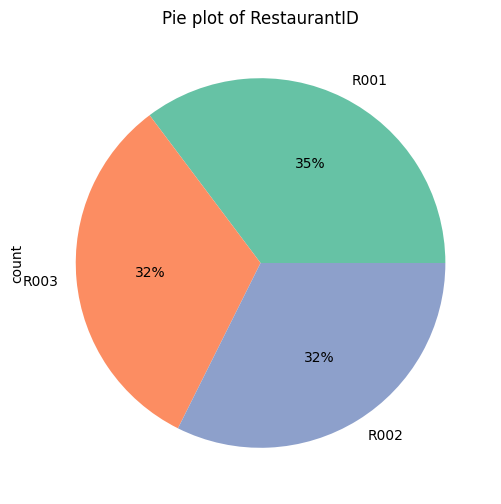

In [ ]:
## RestaurantID
figsize=(12, 6)
pie_plot('RestaurantID')


* plot indicates that there are **close proportions** among IDS

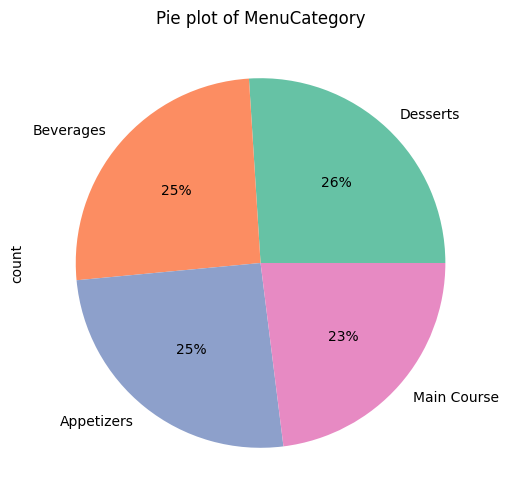

In [ ]:
## MenuCategory
figsize=(12, 6)
pie_plot('MenuCategory')

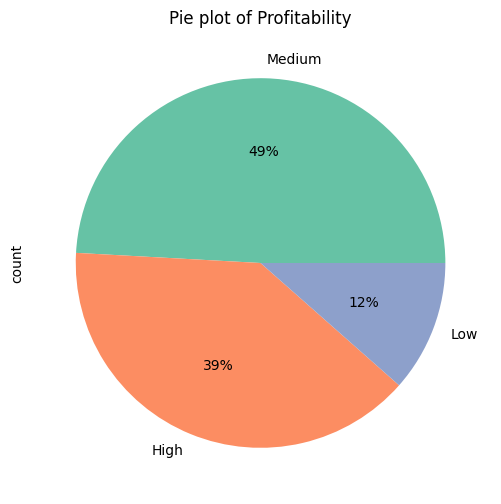

In [ ]:
##Profitability
figsize=(12, 6)
pie_plot('Profitability')

* **49%** of resturant menue items profitability is **medium**, **39%** high and the other is low

### Count plot of  Menu Category & Menu Items:

Text(0.5, 1.0, 'Bar plot of MenuCategory')

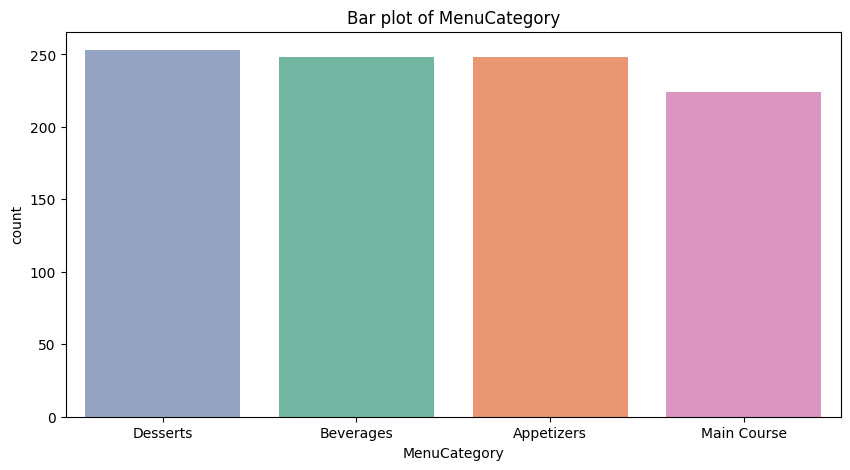

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x ='MenuCategory', hue='MenuCategory',order = df['MenuCategory'].value_counts().index,palette='Set2')
plt.title('Bar plot of MenuCategory')




Text(0.5, 1.0, 'Bar plot of MenuItem')

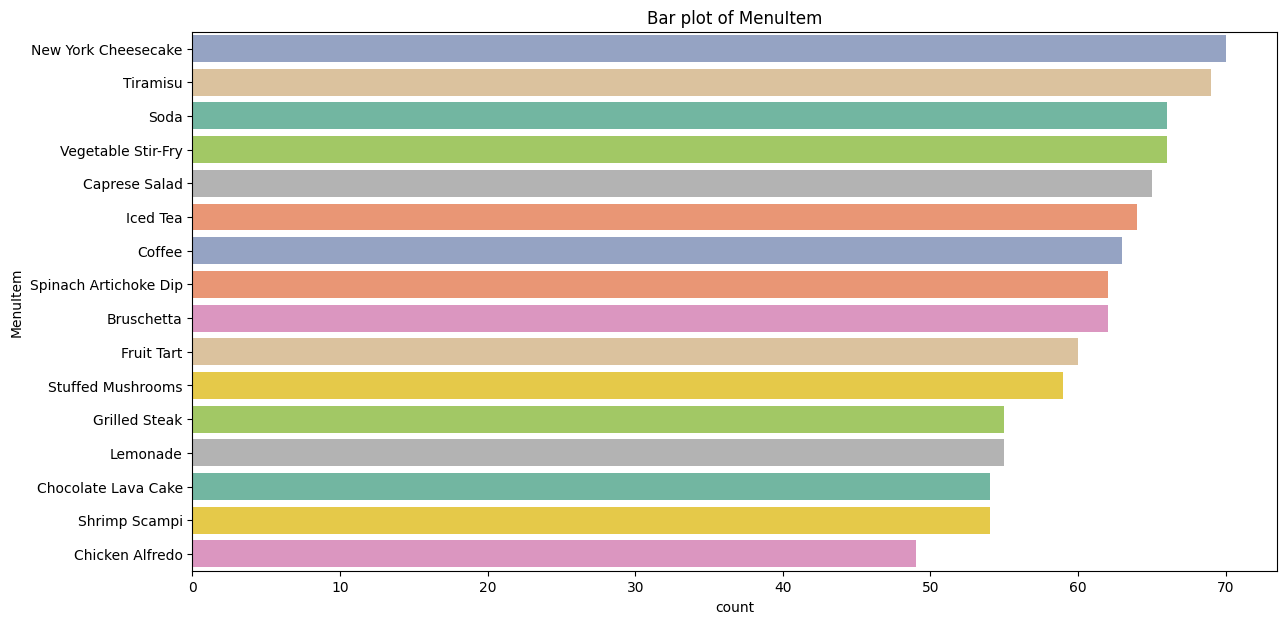

In [ ]:
## MenuItem

plt.figure(figsize=(14,7))
sns.countplot(data = df, y ='MenuItem',hue='MenuItem',order = df['MenuItem'].value_counts().index,palette='Set2')
plt.title('Bar plot of MenuItem')

* **New York Cheesecake** is the most items that has been ordered.

In [ ]:
df.groupby('MenuItem')['Ingredients'].value_counts()
## the ingredients of all items

,,count
MenuItem,Ingredients,
Bruschetta,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",62
Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",65
Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Parmesan']",49
Chocolate Lava Cake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",54
Coffee,['confidential'],63
Fruit Tart,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",60
Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Parmesan']",55
Iced Tea,['confidential'],64
Lemonade,['confidential'],55


### Distribution of Menue Category with Resturant ID:

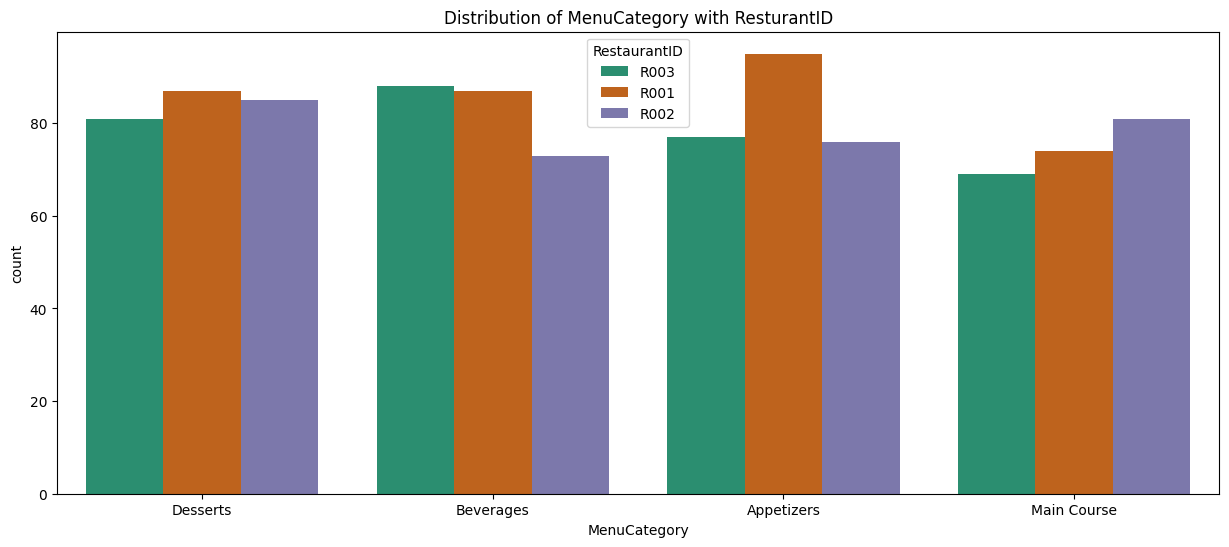

In [ ]:

plt.figure(figsize=(15,6))
sns.countplot(x='MenuCategory',order=df['MenuCategory'].value_counts().index,data=df,hue='RestaurantID',palette='Dark2')
plt.title('Distribution of MenuCategory with ResturantID')
plt.xlabel('MenuCategory')
plt.show()

###  Relaion Among Item Price & Resturant Profitability & Menue Category :

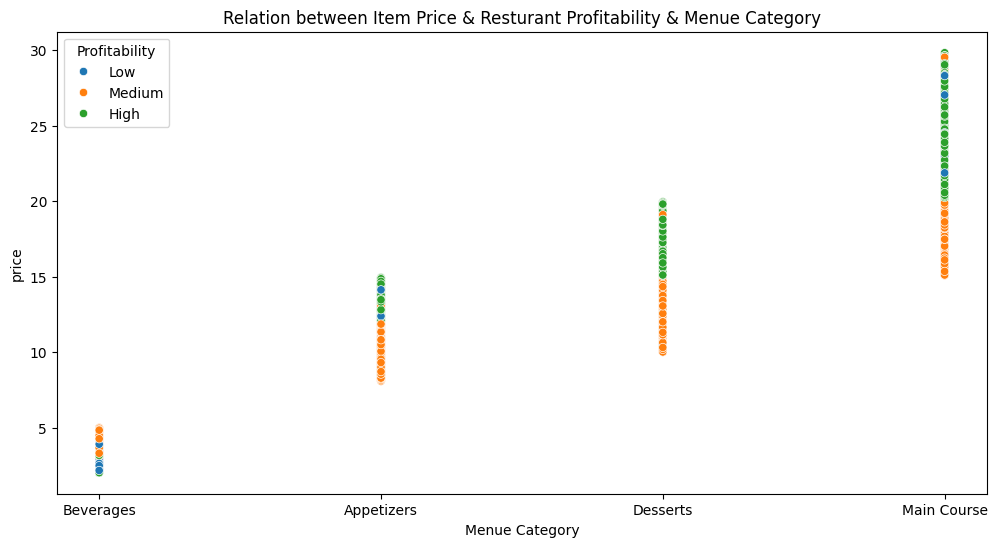

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='MenuCategory', y='Price' , hue = 'Profitability' )
plt.title('Relation between Item Price & Resturant Profitability & Menue Category')
plt.xlabel('Menue Category')
plt.ylabel('price')
plt.show()



*  Beverages is the least price and it has medium and low profitability, than Appetizers, Deserts and Main Course.

### Disturbution of Price:

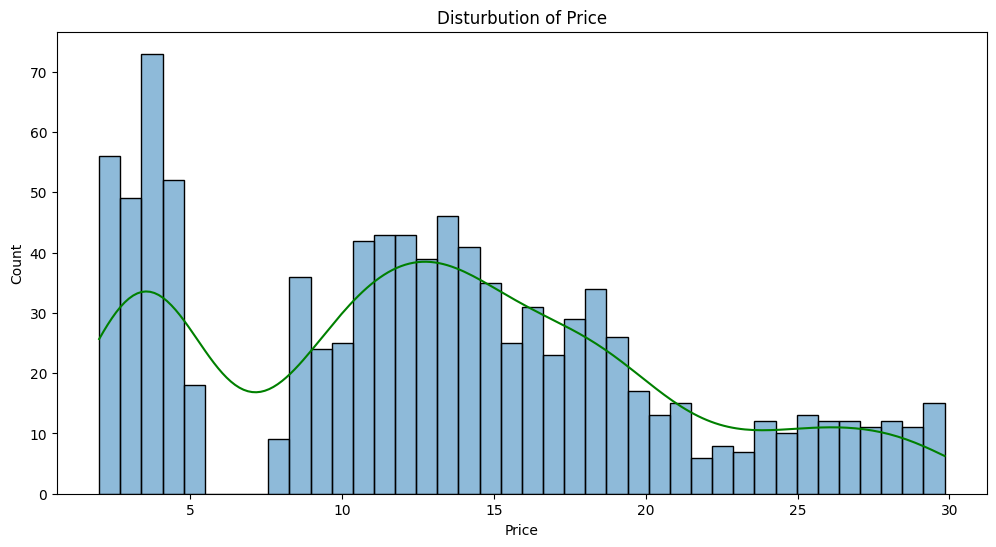

In [ ]:
plt.figure(figsize=(12, 6))
price_hist=sns.histplot(df['Price'],bins=40,kde=True)
price_hist.lines[0].set_color('green')
plt.title('Disturbution of Price')
plt.show()


# Data Preprocessing

In [ ]:
df.head(4)

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High


## Handling Categorical feature:

In [ ]:
## we will convert Resturant ID into one hot encoding
dummies = pd.get_dummies(df['RestaurantID'], sparse=True)
d1=dummies.astype(int)
df = pd.concat([d1,df] , axis =1)


In [39]:
df.drop('RestaurantID' , axis = 1 , inplace = True)

In [40]:
## we will convert  MenuCategory into one hot encoding
dummies = pd.get_dummies(df['MenuCategory'], sparse=True)
d2=dummies.astype(int)
df = pd.concat([d2,df] , axis =1)

In [41]:
df.drop('MenuCategory' , axis = 1 , inplace = True)

In [42]:
## converting of MenuItem to label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['MenuItem'] = label_encoder.fit_transform(df['MenuItem'])

In [43]:
#drop ingredients column:
df.drop('Ingredients' , axis=1 , inplace = True)

In [44]:
## profitability Handling
Profitability_wrapper = {'Low':0 ,  'Medium':1 , 'High':2}
df['Profitability'] = df['Profitability'].replace(Profitability_wrapper)

In [45]:
df

,Appetizers,Beverages,Desserts,Main Course,R001,R002,R003,MenuItem,Price,Profitability
0,0,1,0,0,0,0,1,11,2.55,0
1,1,0,0,0,1,0,0,12,11.12,1
2,0,0,1,0,0,0,1,9,18.66,2
3,0,0,0,1,0,0,1,2,29.55,2
4,0,0,0,1,0,1,0,6,17.73,1
...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1,11,2.16,0
996,1,0,0,0,1,0,0,1,11.86,1
997,0,0,0,1,0,0,1,15,20.57,2
998,0,0,1,0,0,1,0,14,18.80,2


# Train & test split data

In [46]:
X = df.drop('Profitability' , axis = 1)
Y = df['Profitability']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3 , stratify= Y, random_state = 20 , shuffle = True)

# Training Top Models

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , mean_squared_error, r2_score

### SVC

In [51]:

SVC = SVC(kernel = "linear")
SVC.fit(X_train , y_train)

svc_pred = SVC.predict(X_test)

#calculate accuracy
SVC_accuracy = accuracy_score(y_test , svc_pred)
 #calculate  matrix
cm_svc = confusion_matrix(y_test , svc_pred)
mse_svc = mean_squared_error(y_test, svc_pred)
r2_svc = r2_score(y_test, svc_pred)

print(f'svc accuracy : {SVC_accuracy*100}%')
print(f'svc confusion matrix: ')
print(cm_svc)
print(f'Mean square error: {mse_svc}')
print(f'R2 svc: {r2_svc * 100}%')

svc accuracy : 82.53424657534246%
svc confusion matrix: 
[[  0  29   5]
 [  0 136   7]
 [  0  10 105]]
Mean square error: 0.22602739726027396
R2 svc: 47.83879611335157%


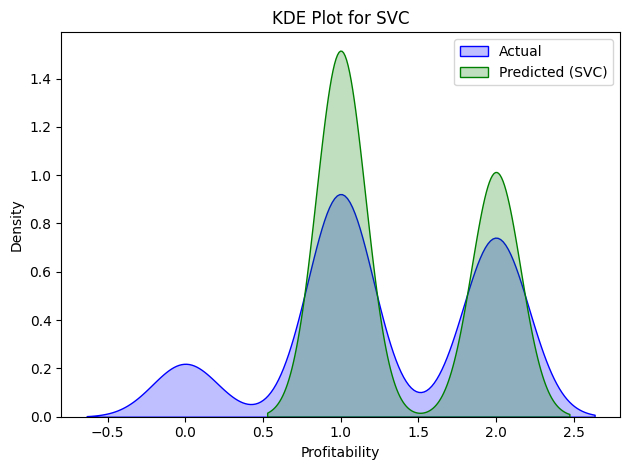

In [53]:
# Plot KDE for Gradient Boosting Regressor
sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
sns.kdeplot(svc_pred, label='Predicted (SVC)', color='green', fill=True)
plt.title('KDE Plot for SVC')
plt.xlabel('Profitability')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


### RandomForest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=1 , random_state=0)
random.fit(X_train , y_train)
Random_pred = random.predict(X_test)

 #calculate accuracy
Random_accuracy = accuracy_score(y_test , Random_pred)

 #calculate confusion matrix
cm = confusion_matrix(y_test , Random_pred)
mse = mean_squared_error(y_test, Random_pred)
r2 = r2_score(y_test, Random_pred)
print(f'randomforest accuracy : {Random_accuracy*100}%')
print(f'randomforest confusion matrix: ')
print(cm)
print(f'MSE RandomForest: {mse}')
print(f'R2 RandomForest: {r2 * 100}%')

randomforest accuracy : 85.61643835616438%
randomforest confusion matrix: 
[[ 22   7   5]
 [  2 126  15]
 [  6   7 102]]
MSE RandomForest: 0.2568493150684932
R2 RandomForest: 40.72590467426315%


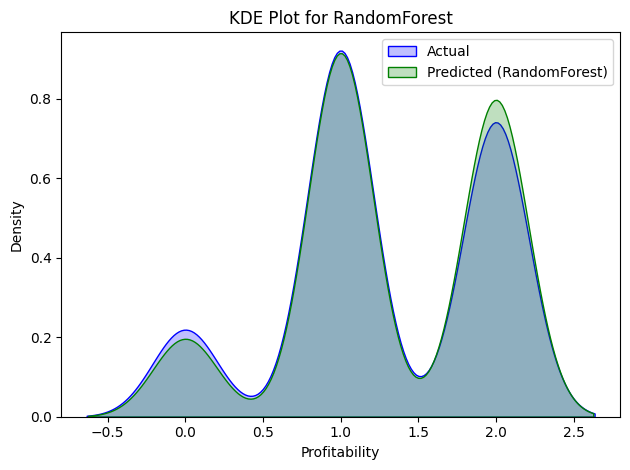

In [54]:
# Plot KDE for RandomForest
sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
sns.kdeplot(Random_pred, label='Predicted (RandomForest)', color='green', fill=True)
plt.title('KDE Plot for RandomForest')
plt.xlabel('Profitability')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

### KNeighborsClassifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier

KNeighbors = KNeighborsClassifier(n_neighbors = 4)
KNeighbors.fit(X_train , y_train)
KNN_pred = KNeighbors.predict(X_test)

KNN_accuracy = accuracy_score(y_test , KNN_pred)

 #calculate confusion matrix
KNN_cm = confusion_matrix(y_test , KNN_pred)
print(f'Kneighbors accuracy : {KNN_accuracy*100}%')
print(f'Kneighbors confusion matrix: ')
print(KNN_cm)


Kneighbors accuracy : 89.38356164383562%
Kneighbors confusion matrix: 
[[ 21   8   5]
 [  2 133   8]
 [  1   7 107]]


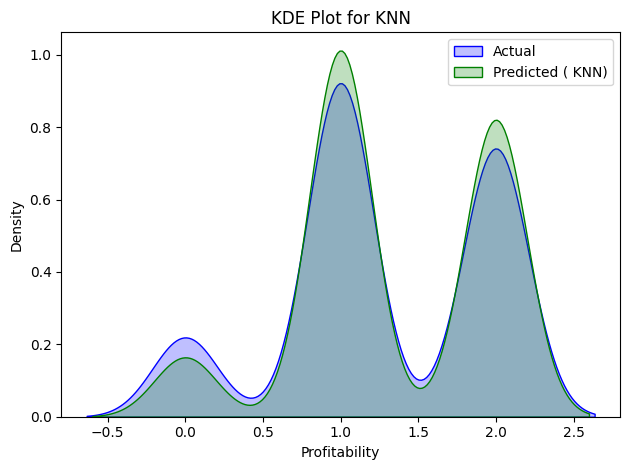

In [67]:
# Plot KDE for Kneighbors Classifier
sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
sns.kdeplot(KNN_pred, label='Predicted ( KNN)', color='green', fill=True)
plt.title('KDE Plot for KNN')
plt.xlabel('Profitability')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

In [70]:
#model_comparison = pd.DataFrame({
 #   'Model': ['SVC', 'RandomForest', 'Gradient Boosting', 'Kneighbors'],
  #  'Accuracy': [SVC_accuracy, Random_accuracy, , KNN_accuracy]
#})

model_comp=pd.DataFrame({
    'Models':['SVC','RandomForst','Kneighbors'],
    'Accuracy':[SVC_accuracy,Random_accuracy,KNN_accuracy]
})
model_comp

,Models,Accuracy
0,SVC,0.825342
1,RandomForst,0.856164
2,Kneighbors,0.893836


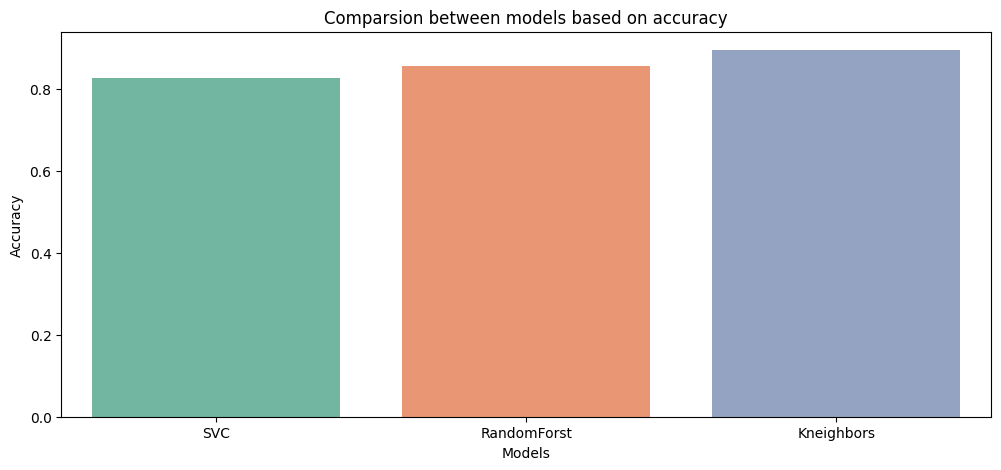

In [73]:
# Plotting
#plt.figure(figsize=(10, 5))
#sns.barplot(x='Model', y='Accuracy', data=model_comparison, palette="viridis")
#plt.title('Model Comparison based on ccuracy')
#plt.xlabel('Model')
#plt.ylabel('Accuracy')
#plt.show()
plt.figure(figsize=(12,5))
sns.barplot(x='Models',hue='Models',y='Accuracy',data=model_comp,palette='Set2')
plt.title('Comparsion between models based on accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()